<a href="https://colab.research.google.com/github/cbonnin88/Machine_Learning_Projects/blob/main/Store_sales_Predictor_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import gdown as gd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
url = 'https://drive.google.com/uc?id=1GLvcwEHXNTWWf0TsdmgOxEfQsIQZR1WT'
gd.download(url,'retail_sales_dataset.csv',quiet=True)

df_retail = pd.read_csv('retail_sales_dataset.csv')
df_retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
selected_columns = ['Date','Price per Unit','Sales']
df_sales_prediction = df_retail[selected_columns]

In [10]:
df_sales_prediction.head()

,Date,Price per Unit,Sales
0,2023-11-24,50,150
1,2023-02-27,500,1000
2,2023-01-13,30,30
3,2023-05-21,500,500
4,2023-05-06,50,100


In [12]:
# Converting date column into numerical format
df_sales_prediction['Date'] = pd.to_datetime(df_sales_prediction['Date']).astype('int64')

In [14]:
# Extracting featurs and target variables
X = df_sales_prediction[['Date','Price per Unit']]
y = df_sales_prediction['Sales']

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [16]:
# Building a linear regression model
model = LinearRegression()

In [17]:
# training our model
model.fit(X_train,y_train)

LinearRegression()

In [20]:
# Evaluating the model
y_pred = model.predict(X_test)
mse = round(mean_squared_error(y_test,y_pred),1)
r2 = round(r2_score(y_test,y_pred),1)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 292923.2
R-squared: -0.0


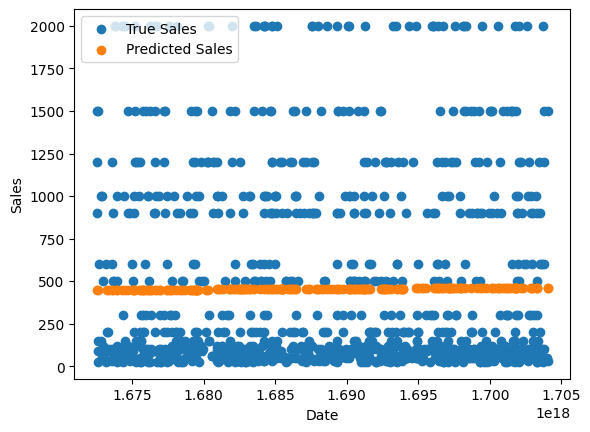

In [23]:
# Visualizing the model performance
plt.scatter(
    df_sales_prediction['Date'],
    df_sales_prediction['Sales'],
    label='True Sales'
)

plt.scatter(
    X_test['Date'],
    y_pred,
    label='Predicted Sales',
    marker='o'
)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()